Found 4217 files belonging to 4 classes.
Using 3374 files for training.
Found 4217 files belonging to 4 classes.
Using 843 files for validation.
Class names: ['cataract', 'diabetic_retinopathy', 'glaucoma', 'normal']


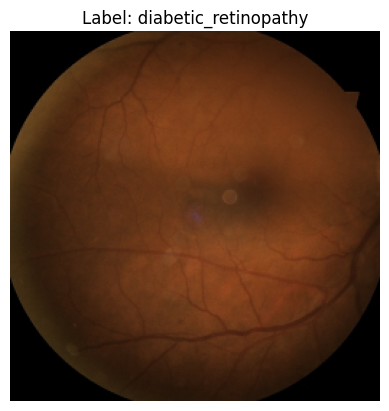

Class counts in training data:
cataract: 834
diabetic_retinopathy: 881
glaucoma: 806
normal: 853
Epoch 1/20


C:\Users\HIMAN\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


106/106 ━━━━━━━━━━━━━━━━━━━━ 16s 133ms/step - acc: 0.5129 - loss: 1.2880 - val_acc: 0.6738 - val_loss: 0.8346
Epoch 2/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 12s 111ms/step - acc: 0.7166 - loss: 0.6857 - val_acc: 0.7972 - val_loss: 0.5223
Epoch 3/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 13s 117ms/step - acc: 0.7589 - loss: 0.5797 - val_acc: 0.8339 - val_loss: 0.4293
Epoch 4/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 12s 115ms/step - acc: 0.7920 - loss: 0.4919 - val_acc: 0.8351 - val_loss: 0.4291
Epoch 5/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 13s 124ms/step - acc: 0.8160 - loss: 0.4585 - val_acc: 0.7023 - val_loss: 0.8525
Epoch 6/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 14s 133ms/step - acc: 0.8175 - loss: 0.4414 - val_acc: 0.8577 - val_loss: 0.3761
Epoch 7/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 13s 116ms/step - acc: 0.8276 - loss: 0.4210 - val_acc: 0.8102 - val_loss: 0.4259
Epoch 8/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 12s 114ms/step - acc: 0.8275 - loss: 0.4101 - val_acc: 0.7307 - val_loss: 0.6757
Epoch 9/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 12s

Validation Loss: 0.36671409010887146
Validation Accuracy: 0.8706998825073242
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


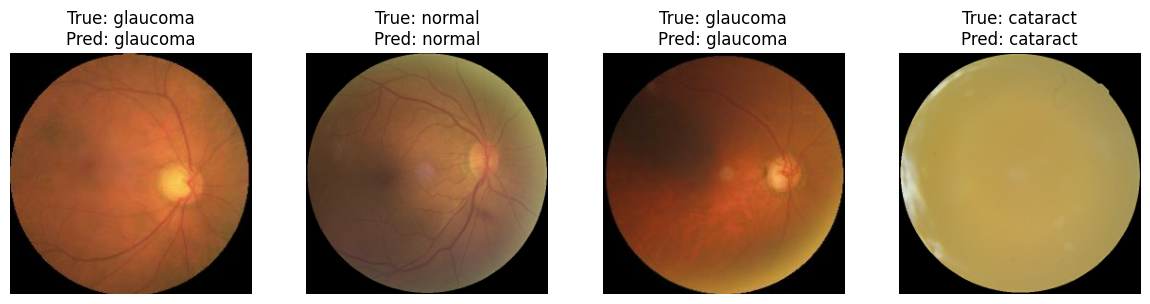

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
Predicted Class: [1]
Prediction Probabilities: [[0.00661682 0.9739768  0.01819614 0.00121019]]


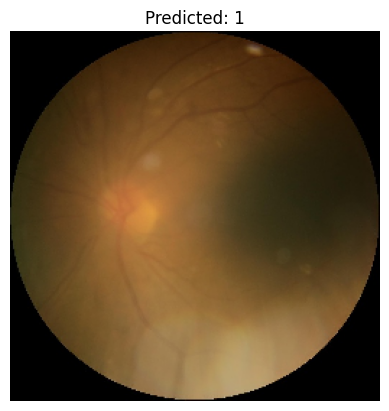

27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - acc: 0.8645 - loss: 0.3684
Validation Loss: 0.3667140603065491
Validation Accuracy: 87.07%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Image 0: True Label = diabetic_retinopathy, Predicted Label = diabetic_retinopathy
Image 1: True Label = normal, Predicted Label = cataract
Image 2: True Label = cataract, Predicted Label = cataract
Image 3: True Label = diabetic_retinopathy, Predicted Label = diabetic_retinopathy
Image 4: True Label = cataract, Predicted Label = cataract
Image 5: True Label = cataract, Predicted Label = cataract
Image 6: True Label = glaucoma, Predicted Label = cataract
Image 7: True Label = normal, Predicted Label = glaucoma
Image 8: True Label = diabetic_retinopathy, Predicted Label = diabetic_retinopathy
Image 9: True Label = normal, Predicted Label = normal
Image 10: True Label = glaucoma, Predicted Label = glaucoma
Image 11: True Label = cataract, Predicted Label = cataract
Image 12: True Label = glaucoma, Predicted Label = glau

ModuleNotFoundError: No module named 'seaborn'

In [ ]:




import tensorflow as tf
import matplotlib.pyplot as plt

# Load the dataset
img_size = (256, 256)
batch_size = 32
seed = 42  # For reproducibility

# Load dataset into a list of images and labels
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    "dataset",
    image_size=img_size,
    batch_size=batch_size,
    shuffle=True,
    seed=seed,  # Add seed here for reproducibility
    validation_split=0.2,  # Specify the validation split
    subset="training"  # This is for the training set
)

# Create the validation set using the validation split
val_data = tf.keras.preprocessing.image_dataset_from_directory(
    "dataset",
    image_size=img_size,
    batch_size=batch_size,
    shuffle=True,
    seed=seed,  # Add seed here for reproducibility
    validation_split=0.2,  # Specify the validation split
    subset="validation"  # This is for the validation set
)

# Show class names
print("Class names:", train_data.class_names)

# Function to display an image
def display_image(image, label):
    # Convert the tensor image to a numpy array and display
    plt.imshow(image.numpy().astype("uint8"))
    plt.title(f"Label: {train_data.class_names[label]}")
    plt.axis('off')
    plt.show()

# Display the first image in the train set
# Fetch one batch and display the first image
image, label = next(iter(train_data))
display_image(image[0], label[0])


# Initialize a dictionary to store the count of each class
class_counts = {class_name: 0 for class_name in train_data.class_names}

# Iterate through the train dataset to count samples in each class
for image_batch, label_batch in train_data:
    for label in label_batch.numpy():
        class_counts[train_data.class_names[label]] += 1

# Print the class counts
print("Class counts in training data:")
for class_name, count in class_counts.items():
    print(f"{class_name}: {count}")


from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping

def cnn_model(NUMBER_OF_CLASSES, input_shape=(256, 256, 3)):
    """
    Creates a CNN model for image classification in Keras with Batch Normalization,
    LeakyReLU, and Dropout layers.

    Parameters:
    - NUMBER_OF_CLASSES: Integer, the number of output classes for classification.
    - input_shape: Tuple, the shape of the input images (height, width, channels).

    Returns:
    - model: A compiled CNN model.
    """
    model = models.Sequential()

    # First Convolutional Block
    model.add(layers.Conv2D(16, (3, 3), strides=2, padding='same', input_shape=input_shape))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    model.add(layers.MaxPooling2D((2, 2), strides=2))

    # Second Convolutional Block
    model.add(layers.Conv2D(32, (3, 3), strides=2, padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    model.add(layers.MaxPooling2D((2, 2), strides=2))

    # Third Convolutional Block
    model.add(layers.Conv2D(64, (3, 3), strides=2, padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    model.add(layers.MaxPooling2D((2, 2), strides=2))

    # Flatten and Dense Layers
    model.add(layers.Flatten())
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(NUMBER_OF_CLASSES, activation='softmax'))  # Softmax for multi-class classification

    # Compile the model
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',  # Suitable for integer labels
                  metrics=['acc'])

    return model

# Set input shape and number of classes
input_shape = (256, 256, 3)  # For 256x256 RGB images
num_classes = len(train_data.class_names)  # Number of output classes

# Create CNN model
cnn_model = cnn_model(num_classes, input_shape)

# EarlyStopping callback to monitor validation loss and stop when it stops improving
#early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with EarlyStopping
history = cnn_model.fit(train_data, validation_data=val_data, epochs=20)

# Print model summary
# cnn_model.summary()

cnn_model.metrics_names

val_loss, val_accuracy = cnn_model.evaluate(val_data)

print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")





cnn_model.save('cat_model.h5')

import numpy as np
import random
import matplotlib.pyplot as plt

# Fetch a batch from the validation dataset
image_batch, label_batch = next(iter(val_data))

# Make predictions on the batch
predictions = cnn_model.predict(image_batch)

# Convert predictions to class labels (argmax to get the class with the highest probability)
predicted_labels = np.argmax(predictions, axis=1)

# Set up the plot
num_images = 4  # Number of images to display
fig, axes = plt.subplots(1, num_images, figsize=(12, 3))

for i in range(num_images):
    # Pick a random index for the image in the batch
    idx = random.randint(0, len(image_batch) - 1)
    
    # Display the image
    axes[i].imshow(image_batch[idx].numpy().astype("uint8"))
    true_label = label_batch[idx].numpy()
    predicted_label = predicted_labels[idx]

    # Display the true vs predicted labels
    axes[i].set_title(f"True: {train_data.class_names[true_label]}\nPred: {train_data.class_names[predicted_label]}")
    axes[i].axis("off")

plt.tight_layout()
plt.show()


import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Load the saved model
model = tf.keras.models.load_model('cat_model.h5')  # Replace with the correct path to your model

# Function to load and preprocess the image for prediction
def prepare_image(img_path, target_size=(256, 256)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)  # Convert image to numpy array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize image (if needed based on your model's training)
    return img_array

# Function to make predictions
def predict(img_path):
    img_array = prepare_image(img_path)
    predictions = model.predict(img_array)  # Get model predictions
    predicted_class = np.argmax(predictions, axis=1)  # Get the class with the highest probability
    return predicted_class, predictions

# Test the prediction function
img_path = 'dataset/cataract/1083_left.jpg'  # Replace with the path to the image you want to predict
predicted_class, predictions = predict(img_path)

# Print the prediction result
print(f"Predicted Class: {predicted_class}")
print(f"Prediction Probabilities: {predictions}")

# Display the image
img = image.load_img(img_path, target_size=(256, 256))
plt.imshow(img)
plt.title(f"Predicted: {predicted_class[0]}")
plt.axis('off')
plt.show()





In [54]:
from tensorflow.keras.models import load_model
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image

# Load the trained model
model = load_model('cateye.h5')

# Define class labels (adjust based on your dataset)
class_labels = ['Cataract', 'Diabetic Retinopathy', 'Glaucoma', 'Normal']

def predict_eye_disease(img_path, target_size=(256, 256)):
    """Loads an image, preprocesses it, and predicts the eye disease class."""
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=target_size)  
    img_array = image.img_to_array(img)  
    img_array = np.expand_dims(img_array, axis=0)  
    img_array = img_array / 255.0  

    # Make prediction
    prediction = model.predict(img_array)  
    predicted_class = np.argmax(prediction)  
    confidence = np.max(prediction)  

    print(f"Predicted Eye Disease: {class_labels[predicted_class]}")
    print(f"Confidence: {confidence:.2f}")

# Example usage
image_path = "dataset\glaucoma\_5_5487582.jpg"  # Update with your image path
predict_eye_disease(image_path)


<>:29: SyntaxWarning: invalid escape sequence '\g'
<>:29: SyntaxWarning: invalid escape sequence '\g'
C:\Users\HIMAN\AppData\Local\Temp\ipykernel_20148\184111484.py:29: SyntaxWarning: invalid escape sequence '\g'
  image_path = "dataset\glaucoma\_5_5487582.jpg"  # Update with your image path


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
Predicted Eye Disease: Glaucoma
Confidence: 0.66


27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - acc: 0.8704 - loss: 0.3846
Validation Loss: 0.36671409010887146
Validation Accuracy: 87.07%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Image 0: True Label = normal, Predicted Label = normal
Image 1: True Label = diabetic_retinopathy, Predicted Label = diabetic_retinopathy
Image 2: True Label = cataract, Predicted Label = cataract
Image 3: True Label = glaucoma, Predicted Label = cataract
Image 4: True Label = normal, Predicted Label = normal
Image 5: True Label = cataract, Predicted Label = cataract
Image 6: True Label = normal, Predicted Label = normal
Image 7: True Label = normal, Predicted Label = normal
Image 8: True Label = diabetic_retinopathy, Predicted Label = diabetic_retinopathy
Image 9: True Label = normal, Predicted Label = normal
Image 10: True Label = normal, Predicted Label = normal
Image 11: True Label = glaucoma, Predicted Label = glaucoma
Image 12: True Label = diabetic_retinopathy, Predicted Label = diabetic_retinopathy
Image 13: 

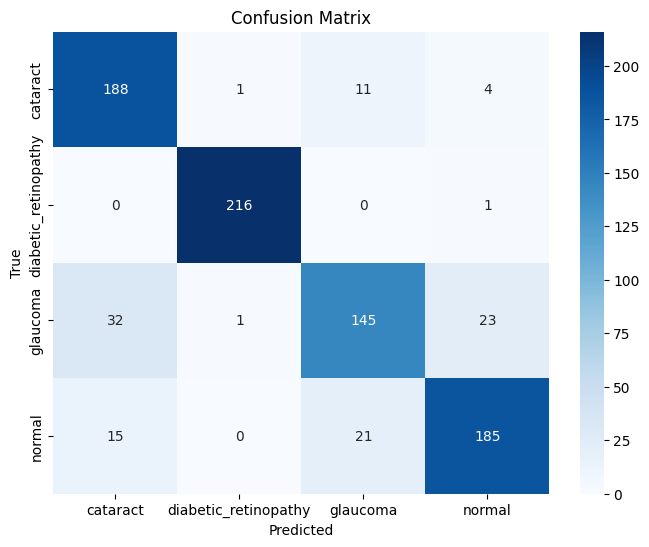

                      precision    recall  f1-score   support

            cataract       0.80      0.92      0.86       204
diabetic_retinopathy       0.99      1.00      0.99       217
            glaucoma       0.82      0.72      0.77       201
              normal       0.87      0.84      0.85       221

            accuracy                           0.87       843
           macro avg       0.87      0.87      0.87       843
        weighted avg       0.87      0.87      0.87       843



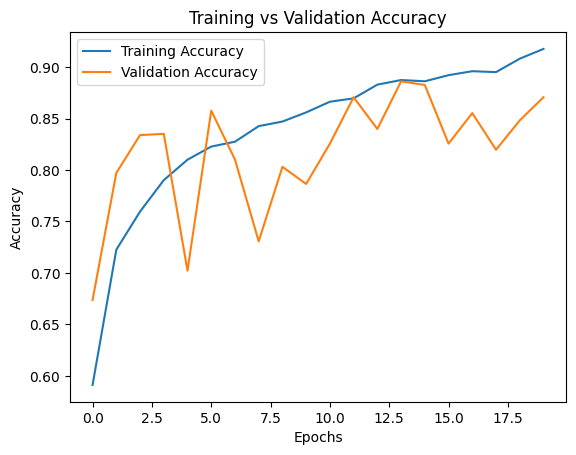

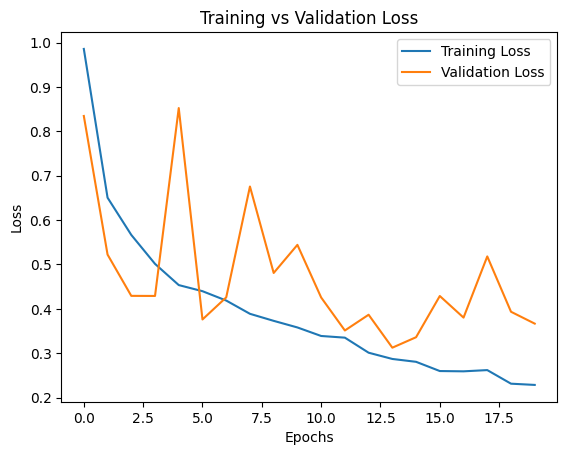

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


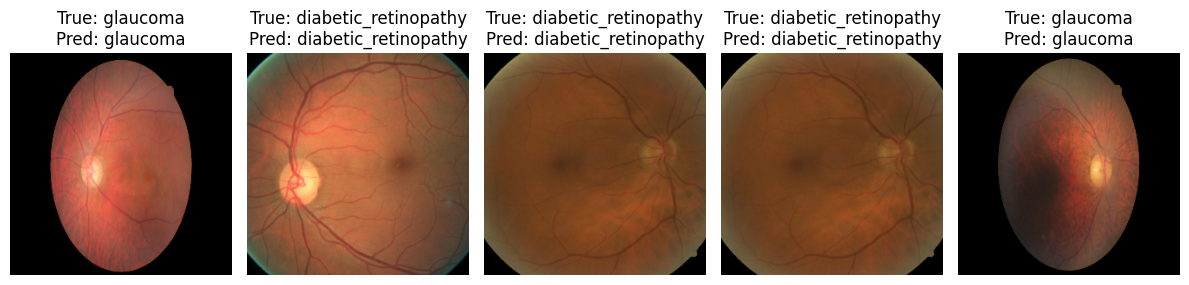

In [2]:
# After model training is complete

# Evaluate the model on the validation set
val_loss, val_accuracy = cnn_model.evaluate(val_data)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

# Fetch a batch of images and true labels from the validation set
image_batch, label_batch = next(iter(val_data))

# Make predictions on the batch
predictions = cnn_model.predict(image_batch)

# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Compare predicted labels with true labels
for i in range(len(predicted_labels)):
    true_label = label_batch[i].numpy()  # True label for the image
    predicted_label = predicted_labels[i]  # Predicted label for the image
    print(f"Image {i}: True Label = {train_data.class_names[true_label]}, Predicted Label = {train_data.class_names[predicted_label]}")

# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_true = []
y_pred = []

for image_batch, label_batch in val_data:
    y_true.extend(label_batch.numpy())
    predictions = cnn_model.predict(image_batch)
    y_pred.extend(np.argmax(predictions, axis=1))

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=train_data.class_names, yticklabels=train_data.class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred, target_names=train_data.class_names))

# Plotting the training and validation accuracy
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Visualizing predictions vs true labels
import random
import matplotlib.pyplot as plt

image_batch, label_batch = next(iter(val_data))

predictions = cnn_model.predict(image_batch)

predicted_labels = np.argmax(predictions, axis=1)

num_images = 5
fig, axes = plt.subplots(1, num_images, figsize=(12, 3))

for i in range(num_images):
    idx = random.randint(0, len(image_batch) - 1)
    axes[i].imshow(image_batch[idx].numpy().astype("uint8"))
    true_label = label_batch[idx].numpy()
    predicted_label = predicted_labels[idx]
    
    axes[i].set_title(f"True: {train_data.class_names[true_label]}\nPred: {train_data.class_names[predicted_label]}")
    axes[i].axis("off")

plt.tight_layout()
plt.show()